<a href="https://colab.research.google.com/github/haraujo21/DS-Projects/blob/haraujo21-patch-1/Analisando%20mortes%20de%20policiais%20em%20servi%C3%A7o%20no%20RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando os dados de Policias mortos em serviço no Rio de Janeiro

Quinta-feira, 06/05/2021, tivemos a operação mais letal da história no Rio de Janeiro. A operação policial terminou com 28 mortos em Jacarezinho, Zona Norte do Rio, entre eles o policial André Leonardo de Mello Frias. Ultimamente essas operações tem causado bastante comentários nas redes sociais. Neste projeto, faremos uma análise em cima dos indicadores estatísticos dos policiais mortos no desde 01/2003 Rio, explorando algumas das variáveis fornecidas.

## Obtenção dos Dados


Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

Disponibilizado em: [IPS Dados Abertos](http://www.ispdados.rj.gov.br/estatistica.html)

### Importando os dados

Importe os dados, usando `df = pd.read_csv("endereço_do_csv")`

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/haraujo21/DS-Projects/main/PoliciaisMortos.csv', sep = ';')

## Análise Inicial dos Dados

Antes de começarmos a análise, vamos verificar as dimensões dos nossos dados:


In [7]:
# verificar o tamanho do DataFrame
print("Variáveis: ", df.shape[1])
print("Entradas: ", df.shape[0])

Variáveis:  5
Entradas:  29368


Em seguida, vamos analisar as variáveis existente em nosso dataset:

In [8]:
# imprimir os nomes das colunas
df.columns

Index(['CISP', 'mes', 'vano', 'pol_militares_mortos_serv',
       'pol_civis_mortos_serv'],
      dtype='object')

In [ ]:
Analisando os tipos de variáveis presentes em nosso dataset:

In [9]:
# ver os tipos das variáveis
df.dtypes

CISP                         int64
mes                          int64
vano                         int64
pol_militares_mortos_serv    int64
pol_civis_mortos_serv        int64
dtype: object

*Explicativa do que é CISP:* retirado em: [ISP Dados Abertos](http://www.ispdados.rj.gov.br/divisaoTerritorial.html)

As Circunscrições Integradas de Segurança Pública - CISP, correspondem às áreas territoriais de atuação e responsabilidade conjunta das delegacias distritais da Secretaria de Estado de Polícia Civil (SEPOL) e das companhias integradas da Secretaria de Estado de Polícia Militar (SEPM). As CISP têm como princípio básico o conceito de que a responsabilidade pelo policiamento de uma subárea da companhia de Polícia Militar deverá coincidir com a circunscrição de uma delegacia de Polícia Civil. Nesse sentido, as CISP constituem a esfera de integração territorial, em nível operacional, das Companhias Integradas da SEPM com as Delegacias de Polícia da SEPOL. As CISP caracterizam, segundo este modelo de integração geográfica, a menor instância de apuração dos indicadores de criminalidade.

Visualizando as 5 primeiras entradas e 5 últimos registros de nosso dataset:

In [11]:
# ver as 5 primeiras entradas do dataset
df.head()

,CISP,mes,vano,pol_militares_mortos_serv,pol_civis_mortos_serv
0,1,1,2003,0,0
1,4,1,2003,0,0
2,5,1,2003,0,0
3,6,1,2003,0,0
4,7,1,2003,0,0


In [12]:
# ver as 5 últimas entradas do dataset
df.tail()

,CISP,mes,vano,pol_militares_mortos_serv,pol_civis_mortos_serv
29363,159,3,2021,0,0
29364,165,3,2021,0,0
29365,166,3,2021,0,0
29366,167,3,2021,0,0
29367,168,3,2021,0,0


Antes de começarmos a analisar os nossos dados, vamos verificar a proporção de dados ausentes em nosso dataset.

In [13]:
# ver os valores faltantes das colunas
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

pol_civis_mortos_serv        0.0
pol_militares_mortos_serv    0.0
vano                         0.0
mes                          0.0
CISP                         0.0
dtype: float64

In [ ]:
Perfeito! Não existem valores ausentes em nossos dados! Portanto, não vamos precisar de estimar valores para completar o dataset.

## Informações Estatísticas da Violência no Rio de Janeiro

Nossos dados existem informações de policiais militar e civil, vamos verificar o resumo estatístico de nosso dataframe para começar nossa análise.



In [14]:
# imprimir o resultado estatístico do DataFrame
df.describe()

,CISP,mes,vano,pol_militares_mortos_serv,pol_civis_mortos_serv
count,29368.000000,29368.000000,29368.000000,29368.000000,29368.000000
mean,81.714826,6.440105,2011.762701,0.015084,0.002486
std,48.313314,3.469762,5.252909,0.139601,0.051807
min,1.000000,1.000000,2003.000000,0.000000,0.000000
25%,38.000000,3.000000,2007.000000,0.000000,0.000000
50%,78.000000,6.000000,2012.000000,0.000000,0.000000
75%,125.000000,9.000000,2016.000000,0.000000,0.000000
max,168.000000,12.000000,2021.000000,4.000000,2.000000


Agora vamos verificar a média de policiais militares mortos:

In [16]:
# ver a média da variável policiais militares mortos
mean_pm = df.pol_militares_mortos_serv.mean()
print(round(mean_pm,2))

0.02


Verificando a média de policiais civis mortos:

In [18]:
# ver a média da variável policiais civis mortos
mean_pc = df.pol_civis_mortos_serv.mean()
print(round(mean_pc,3))

0.002


Com o resultados podemos observar que a média de policiais militares mortos é quase 10x maior que a média de policiais civis!

Agora vamos calcular a quantidade média de policiais mortos por CISP.

In [38]:
#quantidade de CISP
cispt = df.CISP.nunique();
#quantidade de PM mortos
pmm = df.pol_militares_mortos_serv.sum();
pcm = df.pol_civis_mortos_serv.sum();

maxpm = df.pol_militares_mortos_serv.max();
maxpc = df.pol_civis_mortos_serv.max();
#calculadno a média

med = (pmm+pcm)/cispt

print("A quantidade média de policiais mortos por CISP é de {} de 2003 a março de 2021".format(med))
print("A maior quantidade de PM que morreu em uma CISP foi de: {}".format(maxpm))
print("A maior quantidade de PC que morreu em uma CISP foi de: {}".format(maxpc))

A quantidade média de policiais mortos por CISP é de 3.739130434782609 de 2003 a março de 2021
A maior quantidade de PM que morreu em uma CISP foi de: 4
A maior quantidade de PC que morreu em uma CISP foi de: 2


## Visualização de Dados

Vamos agora visualizar o gráfico de morte dos policiais ao longo do tempo desde 2003 a março de 2021:


Total de PM mortos: 443


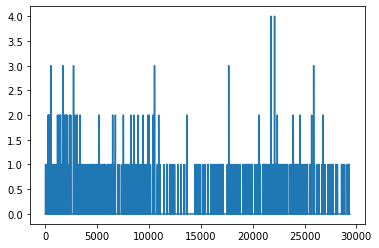

In [46]:
# plotar gráfico de linhas para pm
df.pol_militares_mortos_serv.plot();

print('Total de PM mortos: {}'.format(pmm))

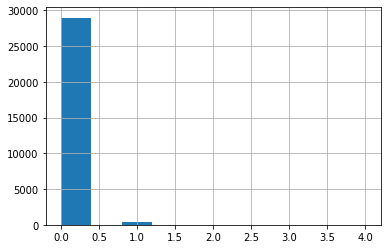

In [47]:
df.pol_militares_mortos_serv.hist();

Total de PC mortos: 73


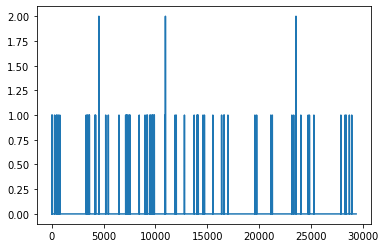

In [44]:
# plotar gráfico de linhas para pc
df.pol_civis_mortos_serv.plot();

print('Total de PC mortos: {}'.format(pcm))

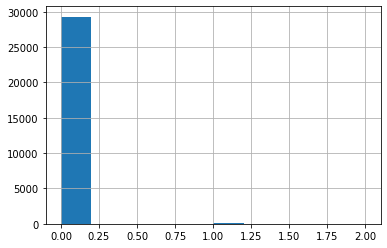

In [48]:
df.pol_civis_mortos_serv.hist();

## Conclusão

Com esses dados, podemos concluir que o policial militar arrisca a sua vida mais que o policial civil durante o serviço na cidade do Rio de Janeiro e desde 2003 é possível notar que quase todos meses teve morte de policial militar em alguma CISP no estado.